# Faure Guillaume et Lucas Garance

# Exercice 1: Mesures de discrimination

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree

## 1.

In [2]:
def entropie_shannon(p):
    return - np.sum(p*np.log2(p))

In [3]:
def entropie_shannon_2_classes(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

In [4]:
def indice_gini(p):
    return 1 - np.sum(p**2)

In [5]:
def indice_gini_2_classes(p):
    return 2*p**2*(1-p)**2

In [6]:
def mesure_ambiguite_2_classes(p):
    epsilon = 1e-10
    return (((1-p)/p+epsilon)*np.log2(2) if p>(1-p) else (p/(1-p+epsilon))*np.log2(2))

/tmp/ipykernel_8215/1601517950.py:2: RuntimeWarning: divide by zero encountered in log2
  return - p*np.log2(p) - (1-p)*np.log2(1-p)
/tmp/ipykernel_8215/1601517950.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return - p*np.log2(p) - (1-p)*np.log2(1-p)


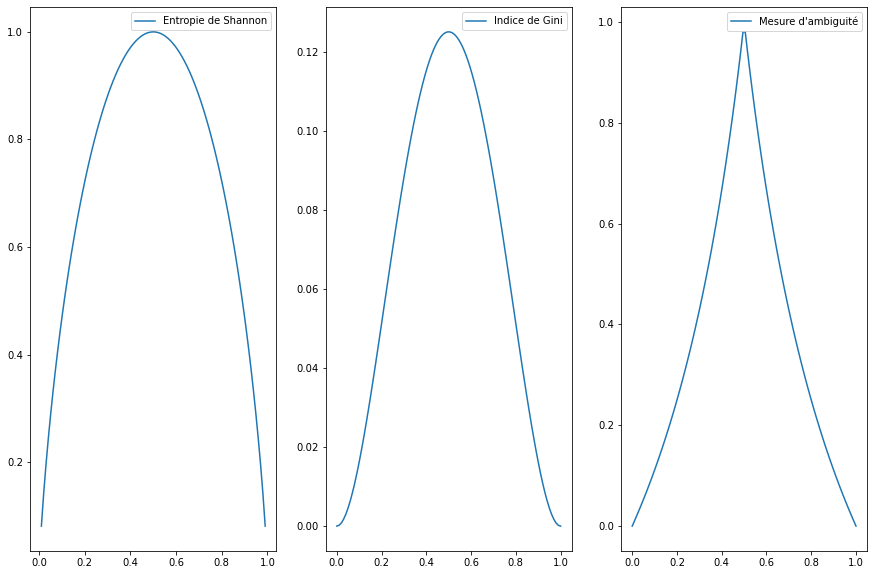

In [7]:
# Tests

p = np.linspace(0,1,100)

e_s = []
i_g = []
m_a = []

for pi in p:
    e_s.append(entropie_shannon_2_classes(pi))
    i_g.append(indice_gini_2_classes(pi))
    m_a.append(mesure_ambiguite_2_classes(pi))

plt.figure(figsize=(15,10))
plt.title('comparaison des mesures')
plt.subplot(1,3,1)
plt.plot(p,e_s,label='Entropie de Shannon')
plt.legend()
plt.subplot(1,3,2)
plt.plot(p,i_g,label='Indice de Gini')
plt.legend()
plt.subplot(1,3,3)
plt.plot(p,m_a,label='Mesure d\'ambiguité')
plt.legend()
plt.show()

## 2.

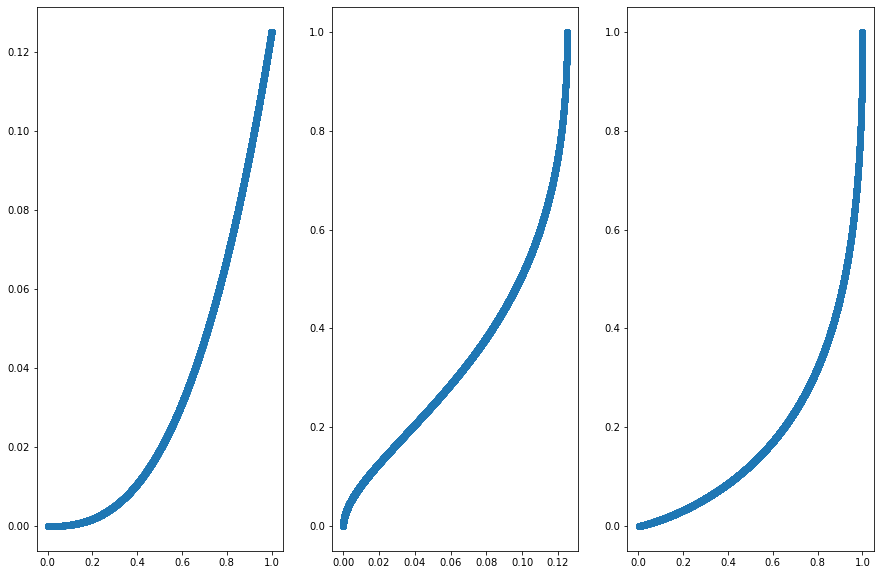

In [283]:
p = np.random.rand(10000)

e_s = []
i_g = []
m_a = [] 

for pi in p:
    e_s.append(entropie_shannon_2_classes(pi))
    i_g.append(indice_gini_2_classes(pi))
    m_a.append(mesure_ambiguite_2_classes(pi))

plt.figure(figsize=(15,10))
plt.legend("Comparaison entropies")
plt.subplot(1,3,1)
plt.scatter(e_s, i_g, label='Comparaison Shannon/Gini')
plt.subplot(1,3,2)
plt.scatter(i_g,m_a, label='Comparaison Mesure d Gini/ambiguite')
plt.subplot(1,3,3)
plt.scatter(e_s,m_a, label='Comparaison Mesure d Shannon/ambiguite')
plt.show()

## 3. 
On remarque que les mesures sont très corrélées car il n'y a pas de dispersion des points autour des courbes.
Cependant si on augmentait le nombre de classes, on verrait que gini et shanon reste très corrélée mais qu'il y aurait une plus grande dispersion si on compare les deux méthodes précédentes avec la mesure d'ambiguité.

# Exercice 2: Arbres de d ́ecision en pr ́esence de donn ́ees symboliques

## 1.

In [285]:
from sklearn.datasets import load_digits
base_digits = load_digits()
print("Descriptions de la base digits:\n", base_digits.data)

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [286]:
X = base_digits.data
Y = base_digits.target 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [287]:
print(base_digits.data.shape)
print(base_digits.target.shape)

(1797, 64)
(1797,)


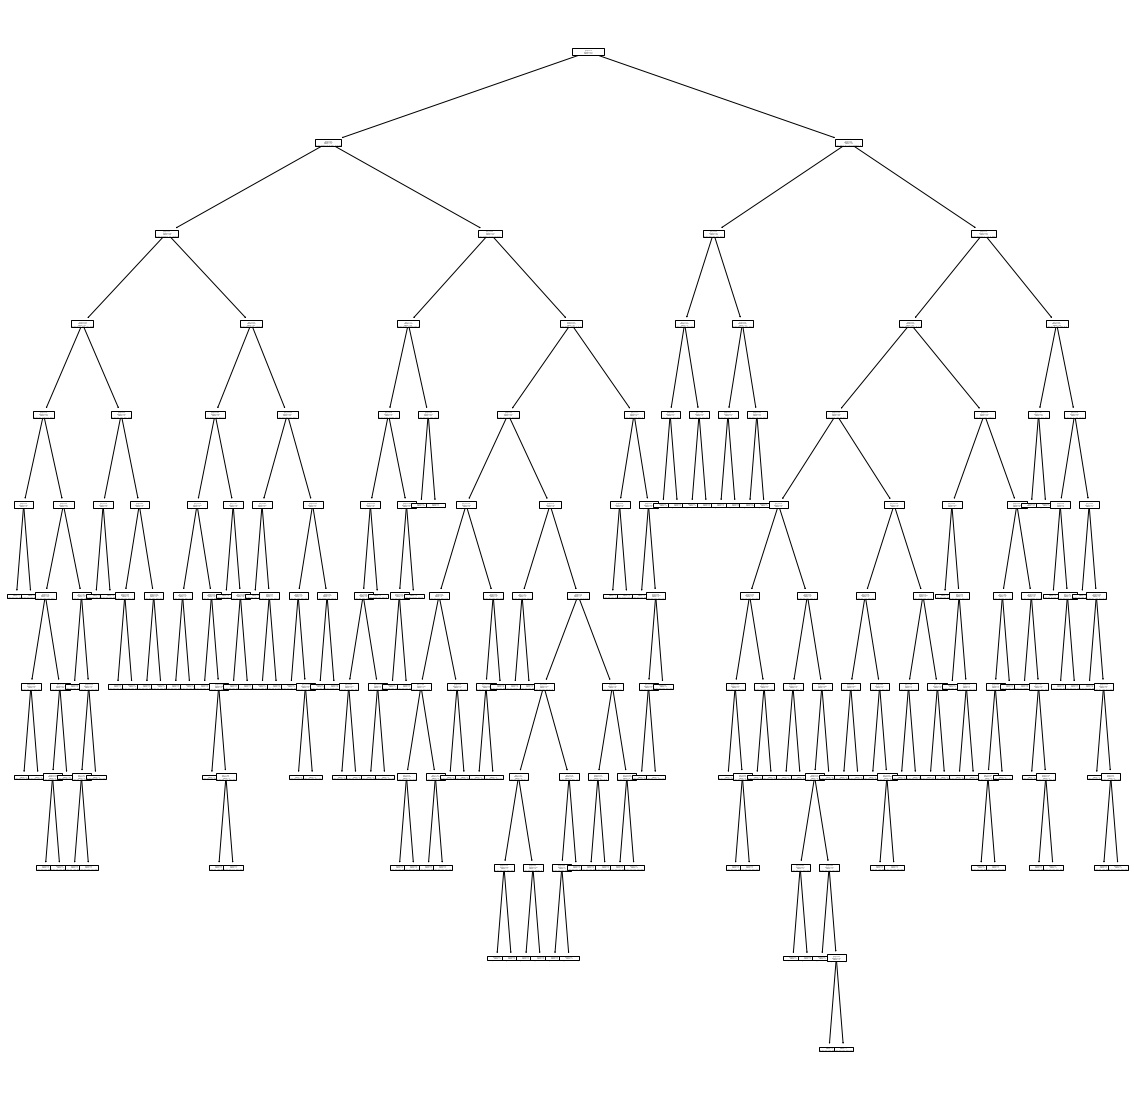

Accuracy:  0.8583333333333333


In [290]:
# initialisation d’un arbre
mon_arbre = tree.DecisionTreeClassifier(criterion='entropy')

# construction de l’arbre
mon_arbre.fit(X_train,Y_train)

# classification avec l’arbre construit
Y_pred = mon_arbre.predict(X_test)

# affichage arbre de décision
plt.figure(figsize=(20, 20))
tree.plot_tree(mon_arbre)
plt.show()


accuracy = mon_arbre.score(X_test,Y_test)
print("Accuracy: ", accuracy)

## 2.

In [146]:
# récupérer le CSV
elections = pd.read_csv('data/elections.csv')
print(elections)

       Adresse Majeur? Nationalite  Label
0        Paris     oui    Francais      1
1        Paris     non    Francais     -1
2  Montpellier     oui     Italien      1
3        Paris     oui      Suisse     -1
4   Strasbourg     non     Italien     -1
5   Strasbourg     non    Francais     -1
6   Strasbourg     oui    Francais      1
7  Montpellier     oui      Suisse     -1


In [291]:
# préparer X et Y 
X = elections.iloc[:,:3]
Y = elections.iloc[:,-1]

print(X)
print(Y)

       Adresse Majeur? Nationalite
0        Paris     oui    Francais
1        Paris     non    Francais
2  Montpellier     oui     Italien
3        Paris     oui      Suisse
4   Strasbourg     non     Italien
5   Strasbourg     non    Francais
6   Strasbourg     oui    Francais
7  Montpellier     oui      Suisse
0    1
1   -1
2    1
3   -1
4   -1
5   -1
6    1
7   -1
Name: Label, dtype: int64


In [292]:
# one hot encoding
columns_to_encode = ['Adresse', 'Nationalite']

dataframe = pd.get_dummies(X, columns = columns_to_encode)

dataframe['Majeur?'] = dataframe['Majeur?'].replace({'oui':1, 'non':0})

dataframe

,Majeur?,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse
0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,0
2,1,1,0,0,0,1,0
3,1,0,1,0,0,0,1
4,0,0,0,1,0,1,0
5,0,0,0,1,1,0,0
6,1,0,0,1,1,0,0
7,1,1,0,0,0,0,1


[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5, 'x[6] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

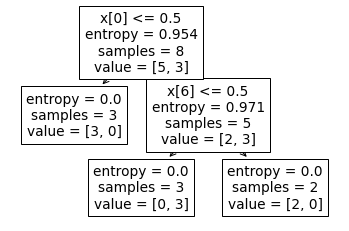

In [16]:
#  initialisation d’un arbre
mon_arbre = tree.DecisionTreeClassifier(criterion='entropy')

# construction de l’arbre
mon_arbre.fit(dataframe,Y)

# affichage arbre de décision
tree.plot_tree(mon_arbre)

## 3.

**Classe Arbre**

In [296]:
# class noeud afin de stocker les informations de la racine, noeuds et feuilles
class node():
    def __init__(self, name =None,feature_index=None, samples =None, children=None, classes=None,attribut=None, valeur_discrim=None, value=None, depth = 0):
        # si le noeud n'est pas une feuille
        self.feature_index = feature_index # indice de l'attribut choisi pour réaliser le split
        self.attribut = attribut # valeurs possibles de l'attribut
        self.name = name # nom de l'attribut
        self.children = children  # dictionnaire sous arbre pour chaque enfant
        self.classes = classes # classes différentes restantes
        self.samples = samples # nombre d'echantillon dans le noeud
        self.valeur_discrim = valeur_discrim # valeur en fonction de la discrimination utilisée
        self.depth = depth # profondeur correspondant au noeud (racin = 0)

        
        # si le noeud est une feuille
        self.value = value # valeur de la feuille = classe
        
class DecisionTreeClassifierSymbolic():
    def __init__(self, eps= 0.1, discrim ='shannon', min_sample_split =2, max_depth=4):
        self.root = None  # init racine
        self.eps = eps  # cut off de discrimination en dessous de laquelle on arrete la construction de l'arbre
        self.discrim = discrim  # mesure de discrimination utilisé : shannon, gini, ambiguite
        self.max_depth = max_depth # profondeur maximale de l'arbre
        self.min_sample_split = min_sample_split # nb minimum d'exemples restant
    
    def fit(self, X, Y):
        ''' fonction pour entrainer l'arbre sous la forme sklearn'''
        dataset = pd.concat([X, Y], axis=1)
        self.root = self.build_tree(dataset)
  
    def build_tree(self, dataset, current_depth=0):
        ''' fonction permettant de créer l arbre '''
        X = dataset.iloc[:,:-1]
        Y = dataset.iloc[:,-1]
        num_samples, num_features = np.shape(X)
        
        # calcul de l'entropie de la classe
        critere = self.critere_arret(Y)
        # test les conditions d'arret: nb minimal d'exemple, profondeur et entropie de la classe
        if num_samples >= self.min_sample_split and current_depth <= self.max_depth and critere >= self.eps:
            # récuperer le meilleur attribut et son nom
            best_attribut, valeur_discrim = self.get_best_attribut(X,Y)
            name_column = X.columns[best_attribut]
            # calculer pour le noeud actuel la repartition des classes 
            rep = self.repartition_classe(Y)
            # création des sous arbres enfants pour chaque valeur de l'attribut choisi
            liste_children = []
            for i in np.unique(X.iloc[:,best_attribut]):
                data = dataset[dataset.iloc[:,best_attribut]==i]
                liste_children.append(self.build_tree(data, current_depth+1))
            #création du noeud de l'arbre et récuperation des valeurs utiles
            return node(feature_index = best_attribut, 
                        children={value: subtree for value, subtree in zip(np.unique(X.iloc[:, best_attribut]), liste_children)},
                        classes = rep, 
                        samples= len(X), 
                        attribut = np.unique(X.iloc[:,best_attribut]),
                        depth = current_depth,
                        name = name_column)
            
        # création de la feuille de l'arbre
        return node(classes = self.repartition_classe(Y),
                    value = self.calculate_leaf_value(Y), 
                    samples = len(X),
                    depth = current_depth)
    
    def critere_arret(self,Y):
        ''' Fonction calculant l entropie de la classe qui correspond à un des critères d'arret '''
        epsilon = 10**-5
        p = self.proba_attribut(Y)
        h = 0
        for p_i in p.values():
            h -= p_i * np.log(p_i + epsilon)
        return h
    
    def proba_attribut(self,X):
        ''' fonction permettant de calculer la probabilité d'un attribut'''
        valeurs_uniques, occurrences = np.unique(X, return_counts=True)
        proba = occurrences/len(X)
        proba_dict = dict(zip(valeurs_uniques , proba))
        return  proba_dict 
        
    def get_best_attribut(self,X,Y):
        ''' fontion permettant de récupérer le meilleur attribut '''
        disc_cond_list = self.discrimination_conditionnelle_list(X,Y)
        best_attribut = np.argmin(disc_cond_list)
        valeur_discrim = np.min(disc_cond_list)
        return best_attribut, valeur_discrim

    def discrimination_conditionnelle_list(self,X,Y):
        ''' ffonction pour calculer la mesure de discrimination conditionnelle pour tous les attributs '''
        # pour tout les features
        liste_discrimination_cond = []
        for i in range(X.shape[1]):
            liste_discrimination_cond.append(self.discrimination_conditionnelle(X.iloc[:,i], Y))
        return liste_discrimination_cond
    
    def discrimination_conditionnelle(self,X,Y):
        if self.discrim == 'shannon':
            return self.shannon(X,Y)
        if self.discrim == 'gini':
            return self. gini(X,Y)
        if self.discrim == 'ambiguite':
            return self.ambiguite(X,Y)
          
    def shannon(self,X,Y):
        '''Calculer l entropie de shannon'''
        attribut = X.name
        classe = Y.name
        data = pd.concat([X, Y], axis=1)
        epsilon = 10**-5
        entropie_cond=0
        dict_proba_classe = self.proba_attribut(Y)
        dict_proba = self.proba_attribut(X)
        # pour tout les attributs
        for j in dict_proba.keys():
            #pour chaque classe
            entropie_cond_class = 0
            # proba de la valeur
            pV = dict_proba[j]
            for k in dict_proba_classe.keys():
                # proba classe inter valeur
                pC_V = (data[attribut] == j) & (data[classe] == k)
                pC_V = pC_V.sum() / len(data)
                # proba classe conditionné à la valeur
                p = pC_V/pV
                entropie_cond_class += p * np.log(p+epsilon)
            #clacul entropie conditionnelle pour un attribut
            entropie_cond -= dict_proba[j] * entropie_cond_class
        return entropie_cond
    
    def calculate_leaf_value(self, Y):
        ''' fonction pour calculer la valeur de la feuille vote majoritaire'''
        Y = list(Y)
        return max(Y, key=Y.count)
     
    def repartition_classe(self,Y):
        ''' fonction pour calculer la repartition des classes'''
        valeurs_uniques_classes, occurrences_classes = np.unique(Y, return_counts=True)
        classes_dict = dict(zip(valeurs_uniques_classes , occurrences_classes))
        return classes_dict
    
    def gini(self,X,Y): 
        ''' fonction pour calculer l entropie de gini'''
        attribut = X.name
        classe = Y.name
        data = pd.concat([X, Y], axis=1)
        gini_cond=0
        dict_proba_classe = self.proba_attribut(Y)
        dict_proba = self.proba_attribut(X)
        # pour tout les attributs
        for j in dict_proba.keys():
            # pour chaque classe
            gini_cond_class = 0
            # proba de la valeur
            pV = dict_proba[j]
            for k in dict_proba_classe.keys():
                # proba classe inter valeur
                pC_V = (data[attribut] == j) & (data[classe] == k)
                pC_V = pC_V.sum() / len(data)
                # proba classe conditionné à la valeur
                p = pC_V/pV
                gini_cond_class += p**2
            #clacul entropie gini cond pour un attribut
            gini_cond += dict_proba[j] * (1 - gini_cond_class)
        return gini_cond

    def ambiguite(self,X,Y):
        eps = 10**-5
        attribut = X.name
        classe = Y.name
        data = pd.concat([X, Y], axis=1)
        ambiguite_cond=0
        dict_proba_classe = self.proba_attribut(Y)
        dict_proba = self.proba_attribut(X)
        # pour tout les attributs
        for j in dict_proba.keys():
            #pour chaque classe
            ambiguite =0
            liste_p =[]
            # proba de la valeur
            pV = dict_proba[j]
            for k in dict_proba_classe.keys():
                # proba classe inter valeur
                pC_V = (data[attribut] == j) & (data[classe] == k)
                pC_V = pC_V.sum() / len(data)
                # proba classe conditionné à la valeur
                p = pC_V/pV
                liste_p.append(p)
            # trier la liste
            liste_ord = sorted(liste_p,reverse =True)
            pi_liste =[]
            # normalisation
            for q in range(len(liste_ord)):
                pi_i = liste_ord[q]/liste_ord[0]
                pi_liste.append(pi_i)
            for q in range(1,len(pi_liste)):
                ambiguite += pi_liste[q] * (np.log(q+eps)-np.log(q-1+eps))
            # calcul de l'ambiguite conditionnelle
            ambiguite_cond += dict_proba[j] * ambiguite
        return ambiguite_cond

    def predict(self, X):
        ''' fonction de prediction pour un batch'''
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self.predict_recursive(self.root, row))
        return predictions

    def predict_recursive(self, node, row):
        ''' fonction de prediction pour un exemple'''
        if node.value is not None:
            return node.value
        feature_value = row[node.feature_index]
        if feature_value in node.children:
            return self.predict_recursive(node.children[feature_value], row)
        else:
            # valeur non vue
            return self.calculate_leaf_value(node.classes)

    def print_tree(self):
        '''fonction pour afficher l'arbre'''
        self.print_tree_recursive(self.root)

    def print_tree_recursive(self, node, indent=""):
        if node.value is not None:
            print(indent + "Leaf Value:", node.value)
        else:
            print(indent + "Feature:",  {node.name} ," => ", node.attribut)
            for value, child in node.children.items():
                print(indent + "|-Feature Value:", value)
                self.print_tree_recursive(child, indent + "    ")
                 
    def predict_xai(self, example):
        ''' fonction qui montre l'explication de la decision pour un exemple'''
        path = []
        self.predict_xai_recursive(self.root, example, path)
        return path

    def predict_xai_recursive(self, node, example, path):
        if node.value is not None:
            # Leaf node reached
            path.append(f"Leaf Value: {node.value}")
        else:
            feature_value = example[node.feature_index]
            path.append(f"Feature: {node.name} => {node.attribut}")
            path.append(f"Exemple Value: {feature_value} \n")
            if feature_value in node.children:
                self.predict_xai_recursive(node.children[feature_value], example, path)
            else:
                path.append("Unseen Value")
                


# 4.

**Affichage de l'arbre de décision avec le feature choisi et les valeurs possibles et la classe attribuée.**

In [297]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.10, min_sample_split = 2, max_depth = 5 , discrim = 'ambiguite')
dtcs.fit(X, Y)
dtcs.print_tree()
print('\nTrue',list(Y))
print('Pred',dtcs.predict(X))

Feature: {'Majeur?'}  =>  ['non' 'oui']
|-Feature Value: non
    Leaf Value: -1
|-Feature Value: oui
    Feature: {'Nationalite'}  =>  ['Francais' 'Italien' 'Suisse']
    |-Feature Value: Francais
        Leaf Value: 1
    |-Feature Value: Italien
        Leaf Value: 1
    |-Feature Value: Suisse
        Leaf Value: -1

True [1, -1, 1, -1, -1, -1, 1, -1]
Pred [1, -1, 1, -1, -1, -1, 1, -1]


**Bien que les données ne soit ici pas en one hot, on voit que le critère majeur? est le premier à être utilisé comme avec sklearn, puis c'est nationalité qui est utilisé alors que c'était nationalité suisse qui était utilisé. Au final la profondeur de l'arbre est la même.**

**Affichage pour un exemple du chemin suivi dans l’arbre pour obtenir la classe**  

**Exemple d'indice 2**

In [298]:
path = dtcs.predict_xai(X.iloc[2])
for step in path:
    print(step)

Feature: Majeur? => ['non' 'oui']
Exemple Value: oui 

Feature: Nationalite => ['Francais' 'Italien' 'Suisse']
Exemple Value: Italien 

Leaf Value: 1


# 5.

**chargement et split des données mushroom**

In [299]:
import pandas as pd

# Charger les fichiers
df1 = pd.read_csv("data/mushrooms-1124.csv")
df2 = pd.read_csv("data/mushrooms-1400-1.csv")
df3 = pd.read_csv("data/mushrooms-1400-2.csv")
df4 = pd.read_csv("data/mushrooms-1400-3.csv")
df5 = pd.read_csv("data/mushrooms-1400-4.csv")
df6 = pd.read_csv("data/mushrooms-1400-5.csv")

# Combiner les DataFrames en un seul DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# repartir en train test 80/20
Y = df["class"]
Y_train = Y.iloc[0:6500]
Y_test = Y.iloc[6500:]
X = df.drop("class", axis=1)
X_train = X.iloc[0:6500]
X_test = X.iloc[6500:]
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

6500
1624
6500
1624


**Affichage de l'arbre de décision avec mesure d'ambiguité**

In [300]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.10, min_sample_split = 4, max_depth = 5 , discrim = 'ambiguite')
dtcs.fit(X_train, Y_train)
dtcs.print_tree()

Feature: {'odor'}  =>  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
|-Feature Value: a
    Leaf Value: e
|-Feature Value: c
    Leaf Value: p
|-Feature Value: f
    Leaf Value: p
|-Feature Value: l
    Leaf Value: e
|-Feature Value: m
    Leaf Value: p
|-Feature Value: n
    Feature: {'spore-print-color'}  =>  ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
    |-Feature Value: b
        Leaf Value: e
    |-Feature Value: h
        Leaf Value: e
    |-Feature Value: k
        Leaf Value: e
    |-Feature Value: n
        Leaf Value: e
    |-Feature Value: o
        Leaf Value: e
    |-Feature Value: r
        Leaf Value: p
    |-Feature Value: w
        Feature: {'cap-color'}  =>  ['b' 'c' 'e' 'g' 'n' 'p' 'w' 'y']
        |-Feature Value: b
            Leaf Value: e
        |-Feature Value: c
            Leaf Value: e
        |-Feature Value: e
            Leaf Value: e
        |-Feature Value: g
            Leaf Value: e
        |-Feature Value: n
            Feature: {'stalk-surface-above-ring'}  =>  ['f'

**cellule permettant juste de trouver les exemples pertinents pour comparer les différents arbres**

In [301]:
indices = X_test.loc[(X_test['odor'] == 'n') & (X_test['spore-print-color'] == 'w') & (X_test['cap-color'] == 'n')].index
print(indices)

Int64Index([6510, 6559, 6665, 6744, 6879, 6880, 6978, 6990, 6995, 7141, 7458,
            7710, 7731, 7818, 7847, 7936, 7938, 7961, 8109],
           dtype='int64')


**Calcul de l'accuracy de l'arbre pour l'ensemble de X_test et représentation d'un chemin pour l'exemple 6744 (l'indice correspond à celui de l'ancien dataframe mais c'est bien un exemple issu de test)**

In [302]:
pred = list(dtcs.predict(X_test))
true = list(Y_test)
from sklearn.metrics import accuracy_score
print('accuracy',accuracy_score(pred,true))
path = dtcs.predict_xai(X_test.loc[6744])
for step in path:
    print(step)

accuracy 1.0
Feature: odor => ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
Exemple Value: n 

Feature: spore-print-color => ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
Exemple Value: w 

Feature: cap-color => ['b' 'c' 'e' 'g' 'n' 'p' 'w' 'y']
Exemple Value: n 

Feature: stalk-surface-above-ring => ['f' 'k' 's' 'y']
Exemple Value: s 

Leaf Value: e


**On fait de même pour shannon**

In [279]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.10, min_sample_split = 4, max_depth = 5 , discrim = 'shannon')
dtcs.fit(X_train, Y_train)
dtcs.print_tree()

Feature: {'odor'}  =>  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
|-Feature Value: a
    Leaf Value: e
|-Feature Value: c
    Leaf Value: p
|-Feature Value: f
    Leaf Value: p
|-Feature Value: l
    Leaf Value: e
|-Feature Value: m
    Leaf Value: p
|-Feature Value: n
    Feature: {'spore-print-color'}  =>  ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
    |-Feature Value: b
        Leaf Value: e
    |-Feature Value: h
        Leaf Value: e
    |-Feature Value: k
        Leaf Value: e
    |-Feature Value: n
        Leaf Value: e
    |-Feature Value: o
        Leaf Value: e
    |-Feature Value: r
        Leaf Value: p
    |-Feature Value: w
        Feature: {'habitat'}  =>  ['d' 'g' 'l' 'p' 'w']
        |-Feature Value: d
            Feature: {'gill-size'}  =>  ['b' 'n']
            |-Feature Value: b
                Leaf Value: e
            |-Feature Value: n
                Leaf Value: p
        |-Feature Value: g
            Leaf Value: e
        |-Feature Value: l
            Feature: {'population

In [280]:
pred = list(dtcs.predict(X_test))
true = list(Y_test)
from sklearn.metrics import accuracy_score
print('accuracy',accuracy_score(pred,true))
path = dtcs.predict_xai(X_test.loc[6744])
for step in path:
    print(step)

accuracy 1.0
Feature: odor => ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
Exemple Value: n 

Feature: spore-print-color => ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
Exemple Value: w 

Feature: habitat => ['d' 'g' 'l' 'p' 'w']
Exemple Value: w 

Leaf Value: e


**Pareil pour gini**

In [281]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.10, min_sample_split = 4, max_depth = 5 , discrim = 'gini')
dtcs.fit(X_train, Y_train)
dtcs.print_tree()

Feature: {'odor'}  =>  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
|-Feature Value: a
    Leaf Value: e
|-Feature Value: c
    Leaf Value: p
|-Feature Value: f
    Leaf Value: p
|-Feature Value: l
    Leaf Value: e
|-Feature Value: m
    Leaf Value: p
|-Feature Value: n
    Feature: {'spore-print-color'}  =>  ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
    |-Feature Value: b
        Leaf Value: e
    |-Feature Value: h
        Leaf Value: e
    |-Feature Value: k
        Leaf Value: e
    |-Feature Value: n
        Leaf Value: e
    |-Feature Value: o
        Leaf Value: e
    |-Feature Value: r
        Leaf Value: p
    |-Feature Value: w
        Feature: {'stalk-surface-below-ring'}  =>  ['f' 'k' 's' 'y']
        |-Feature Value: f
            Leaf Value: e
        |-Feature Value: k
            Leaf Value: e
        |-Feature Value: s
            Leaf Value: e
        |-Feature Value: y
            Feature: {'gill-size'}  =>  ['b' 'n']
            |-Feature Value: b
                Leaf Value: e
  

In [282]:
pred = list(dtcs.predict(X_test))
true = list(Y_test)
from sklearn.metrics import accuracy_score
print('accuracy',accuracy_score(pred,true))
path = dtcs.predict_xai(X_test.loc[6744])
for step in path:
    print(step)

accuracy 0.9981527093596059
Feature: odor => ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
Exemple Value: n 

Feature: spore-print-color => ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
Exemple Value: w 

Feature: stalk-surface-below-ring => ['f' 'k' 's' 'y']
Exemple Value: s 

Leaf Value: e


**On peut voir qu'en fonction de la mesure ambiguite/gini/shannon utilisé l'arbre est légèrement différent cependant les 2 premiers noeuds sont toujours les mêmes sur 'odor' et 'spore-print-color'. On remarque aussi que l'arbre avec la mesure d'ambiguité est plus balancé et moins en peigne que pour gini et shannon.**

**Exemple d'arbre avec modification de la profondeur maximale.
On voit qu'avec une profondeur de 1 on arrive à classifier à 98%**

In [306]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.10, min_sample_split = 4, max_depth = 0, discrim = 'gini')
dtcs.fit(X_train, Y_train)
dtcs.print_tree()
pred = list(dtcs.predict(X_test))
true = list(Y_test)
print('accuracy',accuracy_score(pred,true))

Feature: {'odor'}  =>  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
|-Feature Value: a
    Leaf Value: e
|-Feature Value: c
    Leaf Value: p
|-Feature Value: f
    Leaf Value: p
|-Feature Value: l
    Leaf Value: e
|-Feature Value: m
    Leaf Value: p
|-Feature Value: n
    Leaf Value: e
|-Feature Value: p
    Leaf Value: p
|-Feature Value: s
    Leaf Value: p
|-Feature Value: y
    Leaf Value: p
accuracy 0.9815270935960592


**Exemple d'arbre avec modification du nombre d'echantillon minimal. On voit que m^me avec un echantillon nécessaire de 1500 on arrive à classifier à 99%**

In [309]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.10, min_sample_split = 1500, max_depth = 5, discrim = 'gini')
dtcs.fit(X_train, Y_train)
dtcs.print_tree()
pred = list(dtcs.predict(X_test))
true = list(Y_test)
print('accuracy',accuracy_score(pred,true))

Feature: {'odor'}  =>  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
|-Feature Value: a
    Leaf Value: e
|-Feature Value: c
    Leaf Value: p
|-Feature Value: f
    Leaf Value: p
|-Feature Value: l
    Leaf Value: e
|-Feature Value: m
    Leaf Value: p
|-Feature Value: n
    Feature: {'spore-print-color'}  =>  ['b' 'h' 'k' 'n' 'o' 'r' 'w' 'y']
    |-Feature Value: b
        Leaf Value: e
    |-Feature Value: h
        Leaf Value: e
    |-Feature Value: k
        Leaf Value: e
    |-Feature Value: n
        Leaf Value: e
    |-Feature Value: o
        Leaf Value: e
    |-Feature Value: r
        Leaf Value: p
    |-Feature Value: w
        Leaf Value: e
    |-Feature Value: y
        Leaf Value: e
|-Feature Value: p
    Leaf Value: p
|-Feature Value: s
    Leaf Value: p
|-Feature Value: y
    Leaf Value: p
accuracy 0.9919950738916257


**Exemple d'arbre avec modification de la limite inferieur d'entropie de la classe.**

In [319]:
dtcs = DecisionTreeClassifierSymbolic(eps = 0.20, min_sample_split = 2, max_depth = 5, discrim = 'gini')
dtcs.fit(X_train, Y_train)
dtcs.print_tree()
pred = list(dtcs.predict(X_test))
true = list(Y_test)
print('accuracy',accuracy_score(pred,true))

Feature: {'odor'}  =>  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
|-Feature Value: a
    Leaf Value: e
|-Feature Value: c
    Leaf Value: p
|-Feature Value: f
    Leaf Value: p
|-Feature Value: l
    Leaf Value: e
|-Feature Value: m
    Leaf Value: p
|-Feature Value: n
    Leaf Value: e
|-Feature Value: p
    Leaf Value: p
|-Feature Value: s
    Leaf Value: p
|-Feature Value: y
    Leaf Value: p
accuracy 0.9815270935960592
